# Homework 6

The focus of this homework will be Network and Graphs as well as Neural Networks.

## Exercise 1 [25pts]

In this exercise, you will try to recommend new collaborations to researchers
of the Machine Learning community. Our approach will follow the guidelines of
collaborative filtering: “If your past behavior/preferences were similar
to some other user’s, your future behavior may be as well”. As an
example, imagine you like Rolling Stones, Beatles and Jimmy Hendrix. It turns
out that most people that like the aforementioned artists, are also fans of Eric
Clapton. Then, it is very likely that if you listen to Eric Clapton’s music, you
will like it as well.

In this assignment you will implement a recommendation system for suggesting new collaborations to Machine Learning researchers.

A network as a graph: A graph or network represents relationships among
different entities (users of a social network, researchers, products, etc.). Those
entities are represented as nodes and the relationships between them (friends
on Facebook, co-authors of a research paper, products purchased together) as
edges. When there is an edge between two nodes, x and y, we say that y is a
neighbor (or friend) of x (and also - as the graphs we consider are undirected -
x is also a neighbor of y).

Each line of `edges.txt` contains the names of two researchers that have co-authored a paper in one of the top Machine Learning conferences (NeurIPS, ICLR, ICML) between 2010 and 2016.

a) Write a function that reads the file “old edges.txt” and create a
graph using NetworkX. (This is a tab-separated value (TSV) file, you may
use packages such as Pandas to read it.) [5pts]

In [ ]:
import networkx as nx
import pandas as pd


def create_graph(file):
    data = pd.read_csv(file, sep='\t')
    G = nx.Graph()

    for index, row in data.iterrows():
        G.add_edge(row[0], row[1])
    return G

G = create_graph('edges.txt')

b) Recommend by number of common friends. [10pts]

The intuition behind this recommendation algorithm is that if non-friend
Y is your friend’s friend, then maybe Y should be your friend too. If
person Y is the friend of many of your friends, then Y is an even better
recommendation.

Write a function `common_friends_number(G, X)` that, given G and an author
X, returns a list of recommendations for X. The authors in this list are sorted
by the number of common neighbors they have with X (and are not of course
already friends with X). If there are ties, you can break them arbitrarily.

In [ ]:
def common_friends_number(G, X):
    counter = {}
    for nbr in G[X].keys():
        for frd in G[nbr].keys():
            if frd in G[X] or frd == X:
                continue
            if frd in counter:
                counter[frd] += 1
            else:
                counter[frd] = 1
    counter = sorted(counter.items(), key = lambda kv:kv[1], reverse=True)
    print(counter)
    return [c[0] for c in counter]

result = common_friends_number(G, 'Alan Fern')
print(result)

[('John Walker Orr', 3), ('Shahed Sorower', 3), ('Thomas G. Dietterich', 3), ('Ali Jalali', 2), ('Anh T. Pham', 1), ('Raviv Raich', 1), ('Jesús Pérez Arriaga', 1), ('Rishit Sheth', 1), ('Yuyang Wang', 1)]
['John Walker Orr', 'Shahed Sorower', 'Thomas G. Dietterich', 'Ali Jalali', 'Anh T. Pham', 'Raviv Raich', 'Jesús Pérez Arriaga', 'Rishit Sheth', 'Yuyang Wang']


c) Make recommendations using Jaccard’s Index. [10points]

If Γ(X) is the set of neighbors of X, then the metric we used in part (c), assigns to a non-friend y, the following recommendation score (with respect to X):

score(y) = |Γ(X)∩Γ(y)|.

Jaccard’s Index scales this score by taking into account the union of X and Y ’s neighbors. Intuitively, X and Y are more similar, if what they have in common is as close as possible to what they have together.

Write a function jaccard index(G, X) that given G and an author X, returns a
list of recommendations for X. The authors in this list are sorted by the number
of their Jaccard Index with respect to X (and are not of course already friends
with X). If there are ties, you can break them arbitrarily.

Jaccard Index = |Γ(X)∩Γ(y)| / |Γ(X)∪Γ(y)|

In [ ]:
def jaccard(G, X, y):
    intersection = len(list(set(G[X].keys()).intersection(G[y].keys())))
    union = (len(G[X]) + len(G[y])) - intersection
    return float(intersection) / union

def jaccard_index(G, X):
    Y = common_friends_number(G, X)
    result = {}
    for y in Y:
        result[y] = jaccard(G, X, y)    
    result = sorted(result.items(), key=lambda kv: kv[1], reverse=True)
    print(result)
    return [r[0] for r in result]

jaccard_index(G, 'Alan Fern')


[('John Walker Orr', 3), ('Shahed Sorower', 3), ('Thomas G. Dietterich', 3), ('Ali Jalali', 2), ('Anh T. Pham', 1), ('Raviv Raich', 1), ('Jesús Pérez Arriaga', 1), ('Rishit Sheth', 1), ('Yuyang Wang', 1)]
[('John Walker Orr', 0.23076923076923078), ('Shahed Sorower', 0.23076923076923078), ('Thomas G. Dietterich', 0.16666666666666666), ('Ali Jalali', 0.1111111111111111), ('Rishit Sheth', 0.08333333333333333), ('Yuyang Wang', 0.08333333333333333), ('Anh T. Pham', 0.07692307692307693), ('Jesús Pérez Arriaga', 0.07692307692307693), ('Raviv Raich', 0.06666666666666667)]


['John Walker Orr',
 'Shahed Sorower',
 'Thomas G. Dietterich',
 'Ali Jalali',
 'Rishit Sheth',
 'Yuyang Wang',
 'Anh T. Pham',
 'Jesús Pérez Arriaga',
 'Raviv Raich']

## Exercise 2 [55pts]

This exercise will focus on Neural Networks and visualization.

a) Write a function that takes a keras network and outputs an image (png format) of the network. [10pts]

You can assume the model is sequential and only uses dense layers. The output image for

```python
    model = keras.models.Sequential()
    model.add(layers.Dense(2, input_dim=2))
    model.add(layers.Dense(1))
    model.compile(loss="binary_crossentropy")
```

should look something like this

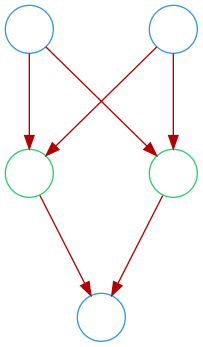

In [2]:
from IPython.display import Image
Image(filename="example.png")

Hint: use the networkx library (specifically the [to_agraph](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.to_agraph.html) method)

In [ ]:
def draw(model):
    last_layer = list(range(model.layers[0].input_shape[1]))
    last = len(last_layer)
    G = nx.DiGraph()
    G.add_nodes_from(last_layer)
    for layer in model.layers:
        nodes = list(range(last, last+layer.units))
        # print(last_layer, nodes)
        G.add_nodes_from(nodes)
        G.add_edges_from([(l, n) for l in last_layer for n in nodes])
        last_layer = nodes
        last = last + layer.units
    G = nx.nx_agraph.to_agraph(G)
    G.draw('model.png', prog='dot')
    return G

b) Generate 100 datapoints of the form y = 3x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [5pts]

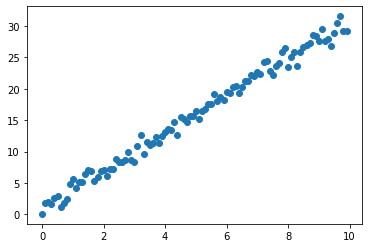

In [ ]:
from numpy import random
import numpy as np
from matplotlib import pyplot as plt 

y = random.normal(size=(100))
x = np.arange(0, 10, 0.1)
y += 3 * x + 1

plt.scatter(x, y)

c) Create a Neural Network with no hidden layers (just input to ouput each with just one neuron), using the `mean_squared_error` loss and no activation function. Create an image of this model using a) then train this model on the dataset from b). In a 3D plot, plot the weight, the bias, and the loss value. [10pts]

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 598.7891
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 597.4944
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 596.2097
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 594.9182
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 593.6403
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 592.3246
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 591.1296
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 589.8154
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 588.5953
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 587.2791
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 586.0546
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 584.8121
Epoch 13/100
4/4 [===================

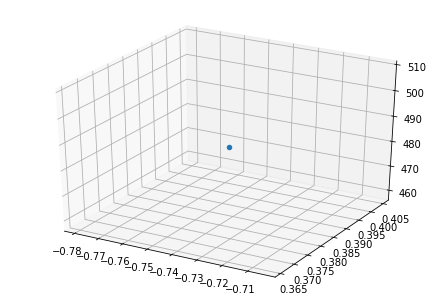

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D

model = keras.models.Sequential()
model.add(layers.Dense(1, input_dim=1))
model.compile(loss="mean_squared_error", optimizer='Adam')

draw(model)
Image(filename="model.png")

history = model.fit(x, y, epochs=100)

fig = plt.figure()
ax = Axes3D(fig)
weight, bias = model.layers[0].get_weights()
weight = weight[0]
ax.scatter(weight, bias, history.history['loss'][-1])
plt.show()

d) Using matplotlib animation, re-train the model from c) and create an animation of the weight, bias, and loss at each training epoch. [10pts]

Epoch 1/5
4/4 [==============================] - 0s 5ms/step - loss: 482.5163
Epoch 2/5
4/4 [==============================] - 0s 6ms/step - loss: 481.5126
Epoch 3/5
4/4 [==============================] - 0s 6ms/step - loss: 480.5179
Epoch 4/5
4/4 [==============================] - 0s 3ms/step - loss: 479.4731
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 478.4205
Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 477.3757
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 476.3345
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 475.2451
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 474.2203
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 473.2034
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 472.1333
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 471.1526
Epoch 8/10
4/4 [==============================] - 0s 7ms/

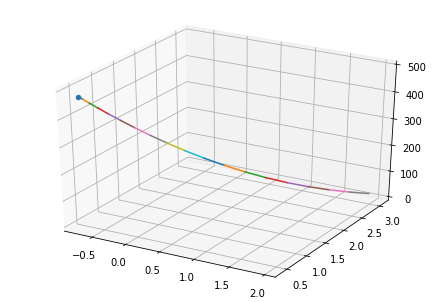

In [ ]:
import matplotlib.animation as animation

EPOCH = 100
FREQ = 5

fig = plt.figure()
ax = Axes3D(fig)
last_point = []

def train(frame):
    global last_point
    if frame == 0:
      return ax
    history = model.fit(x, y, epochs=FREQ * frame)
    weight, bias = model.layers[0].get_weights()
    weight = weight[0]
    if last_point:
        ax.plot([last_point[0], weight], [last_point[1], bias], [last_point[2], history.history['loss'][-1]])
    else:
        ax.scatter(weight, bias, history.history['loss'][-1])
    
    last_point = [weight, bias, history.history['loss'][-1]]
    return ax

ani = animation.FuncAnimation(fig, train, EPOCH // FREQ, repeat=False, save_count=100)
ani.save("model.gif", writer='pillow')
plt.show()

e) Generate data of the form y = 3x^3 + 2x^2 + x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [5pts]

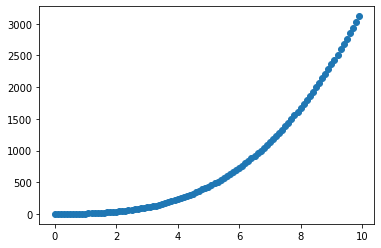

In [ ]:
y = random.normal(size=(100))
x = np.arange(0, 10, 0.1)
y += 3*x**3 + 2*x**2 + x + 1

plt.scatter(x, y)

f) Create and train a neural network on the dataset from b) and plot the resulting curve through the scatter plot. (you can use any number of epochs, hidden layers etc.) Also create an image of the network using the function from a) [10pts]

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 1446266.2500
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 1418843.3750
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 1373400.6250
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 1310318.0000
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 1226451.8750
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: 1118873.5000
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: 998453.1250
Epoch 8/1000
7/7 [==============================] - 0s 3ms/step - loss: 865237.8125
Epoch 9/1000
7/7 [==============================] - 0s 3ms/step - loss: 729210.1875
Epoch 10/1000
7/7 [==============================] - 0s 3ms/step - loss: 599774.8125
Epoch 11/1000
7/7 [==============================] - 0s 2ms/step - loss: 480844.3125
Epoch 12/1000
7/7 [==============================] - 0s 2ms/step - l

<AGraph <Swig Object of type 'Agraph_t *' at 0x7fa19d431510>>

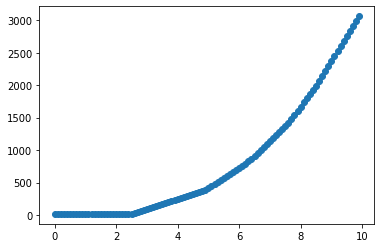

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(16, input_dim=1, activation='relu'))
model.add(layers.Dense(1))
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=0.05))
model.fit(x, y, epochs=1000, batch_size=16)

pre = model.predict(x)
plt.scatter(x, pre)

draw(model)

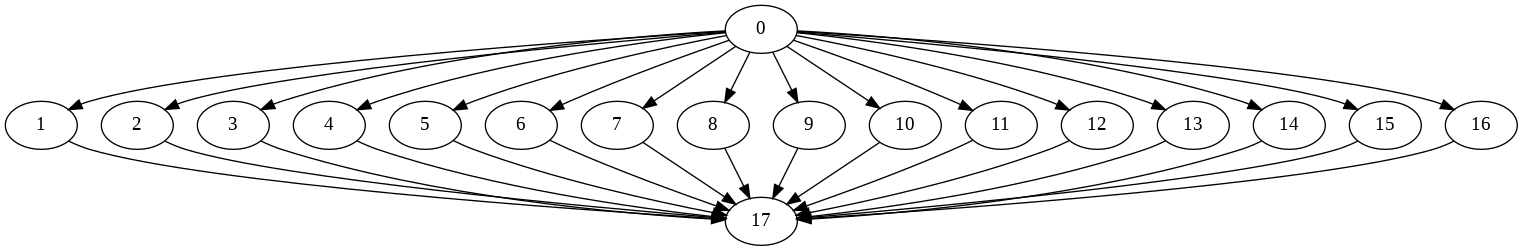

In [4]:
Image(filename="model2.png")

g) Using matplotlib animation, create an animation of the resulting curve from your model at each training epoch (up to 100 epochs). [5pts]

Epoch 1/5
7/7 [==============================] - 0s 4ms/step - loss: 123.7654
Epoch 2/5
7/7 [==============================] - 0s 3ms/step - loss: 128.9692
Epoch 3/5
7/7 [==============================] - 0s 3ms/step - loss: 110.9514
Epoch 4/5
7/7 [==============================] - 0s 3ms/step - loss: 116.7103
Epoch 5/5
7/7 [==============================] - 0s 3ms/step - loss: 151.1424
Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 111.1518
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 116.9758
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 137.4339
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 210.5629
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 124.6356
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 126.5759
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 115.6311
Epoch 8/10
7/7 [==============================] - 0s 3ms/

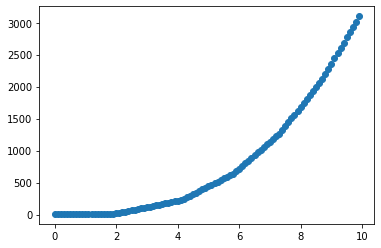

In [ ]:
fig = plt.figure()

def train(frame):
    model.fit(x, y, epochs=frame, batch_size=16)
    predict = model.predict(x)
    plt.clf()
    plt.scatter(x, predict)
    return plt
    

ani = animation.FuncAnimation(fig, train, range(0, 100, 5), repeat=False)
ani.save("model.gif", writer='pillow')
plt.show()

## Exercise 3 [20pts]

This exercise will focus on Neural Networks.



In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms 
from torch.optim import SGD, Adam
from tqdm import tqdm 

a) Modify the number of layers to include atleast 2 hidden layers with appropriate number of neurons that use the sigmoid function in the forward pass: [5pts]

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size):
    super(NeuralNetwork, self).__init__()
    # You are free to define any number of layers you want to here

    self.layer1 = nn.Linear(input_size, 800)
    # your code here
    self.layer2 = nn.Linear(800, 300)
    self.output = nn.Linear(300, 10)  
    self.dropout = nn.Dropout(0.2)


  def forward(self, input):
    x = F.relu(self.layer1(input))
    # your code here
    x = F.sigmoid(self.layer2(x))
    x = self.dropout(x)
    outputs = self.output(x)

    return F.softmax(outputs)

b) Modify the following values to provide the highest accuracy on your Neural Network [2pts]

In [ ]:
epochs = 100                      # number of epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")     # device
criterion = nn.CrossEntropyLoss() # loss function
batch_size = 256

Run the following cell everytime you update parts a and b

In [ ]:
net = NeuralNetwork(784).to(device)
optimizer = Adam(net.parameters(), lr = 1e-2)

total_loss = 0


#######################################
### Downloading the data


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True, num_workers=2, drop_last = True)
train_dataloader2 = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True, num_workers=2, drop_last = True)

test_dataloader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers=2, drop_last = True)
test_dataloader2 = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers=2, drop_last = True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



c) You may change the model to increase the accuracy of this model. The goal is to attain the highest possible accuracy. You do not get marks for accuracies less than 83%. You may modify the values in parts a and b [8pts]

In [ ]:
for epoch in tqdm(range(epochs)): 
  epoch_loss = 0
  for i, data in enumerate(train_dataloader): 
    inputs, labels = data 

    optimizer.zero_grad() 
    outputs = net(inputs.view(batch_size,-1).to(device))

    labels_ = F.one_hot(labels, num_classes= 10)

    loss = criterion(outputs,labels_.to(device).float())
    loss.backward()  # update network parameters

    optimizer.step() # update the optimizer parameters 

    total_loss += loss.item() 
    epoch_loss += loss.item()
  
  with torch.no_grad():
    net.eval()
    correct = 0
    total = 0
    for i, data in enumerate(train_dataloader2):
      input, labels = data
      outputs = net(input.view(batch_size,-1).to(device))

      total+= len(labels)

      predictions = torch.argmax(outputs, dim = 1)
      predictions = predictions.to("cpu").numpy() 
      correct += sum(1*(labels.numpy()==predictions))
  
  with torch.no_grad():
    net.eval()
    correct_test = 0
    total_test = 0
    for i, data in enumerate(test_dataloader):
      input, labels = data
      outputs = net(input.view(batch_size,-1).to(device))

      total_test+= len(labels)

      predictions = torch.argmax(outputs, dim = 1)
      predictions = predictions.to("cpu").numpy() 
      correct_test += sum(1*(labels.numpy()==predictions))

  print("epoch = ", epoch, " loss = ", epoch_loss, "  training accuracy = ", correct/total, "test accuracy = ", correct_test/total_test)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  1%|          | 1/100 [00:25<41:15, 25.01s/it]

epoch =  0  loss =  431.0107247829437   training accuracy =  0.6516593215811965 test accuracy =  0.6462339743589743


  2%|▏         | 2/100 [00:47<38:52, 23.80s/it]

epoch =  1  loss =  400.86292552948   training accuracy =  0.7995292467948718 test accuracy =  0.7936698717948718


  3%|▎         | 3/100 [01:13<39:54, 24.68s/it]

epoch =  2  loss =  387.87991523742676   training accuracy =  0.8105969551282052 test accuracy =  0.7980769230769231


  4%|▍         | 4/100 [01:44<43:06, 26.94s/it]

epoch =  3  loss =  386.84780406951904   training accuracy =  0.8226662660256411 test accuracy =  0.8114983974358975


  5%|▌         | 5/100 [02:14<44:52, 28.34s/it]

epoch =  4  loss =  381.662974357605   training accuracy =  0.836204594017094 test accuracy =  0.8247195512820513


  6%|▌         | 6/100 [02:51<48:42, 31.09s/it]

epoch =  5  loss =  376.9621125459671   training accuracy =  0.8547175480769231 test accuracy =  0.8405448717948718


  7%|▋         | 7/100 [03:20<47:25, 30.60s/it]

epoch =  6  loss =  375.8737177848816   training accuracy =  0.8555355235042735 test accuracy =  0.84375


  8%|▊         | 8/100 [03:50<46:30, 30.34s/it]

epoch =  7  loss =  374.696240901947   training accuracy =  0.8503939636752137 test accuracy =  0.8342347756410257


  9%|▉         | 9/100 [04:19<45:30, 30.00s/it]

epoch =  8  loss =  375.034006357193   training accuracy =  0.8678552350427351 test accuracy =  0.8543669871794872


 10%|█         | 10/100 [04:49<44:37, 29.75s/it]

epoch =  9  loss =  374.75352239608765   training accuracy =  0.8516292735042735 test accuracy =  0.8399439102564102


 11%|█         | 11/100 [05:17<43:39, 29.44s/it]

epoch =  10  loss =  374.0538102388382   training accuracy =  0.8569043803418803 test accuracy =  0.8395432692307693


 12%|█▏        | 12/100 [05:46<42:48, 29.19s/it]

epoch =  11  loss =  373.4346092939377   training accuracy =  0.8638488247863247 test accuracy =  0.8510616987179487


 13%|█▎        | 13/100 [06:14<41:53, 28.90s/it]

epoch =  12  loss =  373.5932260751724   training accuracy =  0.8634481837606838 test accuracy =  0.8454527243589743


 14%|█▍        | 14/100 [06:42<40:43, 28.42s/it]

epoch =  13  loss =  373.5861803293228   training accuracy =  0.8761017628205128 test accuracy =  0.8597756410256411


 15%|█▌        | 15/100 [07:09<39:55, 28.18s/it]

epoch =  14  loss =  373.1684192419052   training accuracy =  0.86328125 test accuracy =  0.8467548076923077


 16%|█▌        | 16/100 [07:37<39:12, 28.01s/it]

epoch =  15  loss =  372.8151067495346   training accuracy =  0.8522970085470085 test accuracy =  0.8334334935897436


 17%|█▋        | 17/100 [08:04<38:22, 27.75s/it]

epoch =  16  loss =  373.4686053991318   training accuracy =  0.8718616452991453 test accuracy =  0.8566706730769231


 18%|█▊        | 18/100 [08:30<37:24, 27.37s/it]

epoch =  17  loss =  372.97988522052765   training accuracy =  0.8644998664529915 test accuracy =  0.8495592948717948


 19%|█▉        | 19/100 [08:57<36:34, 27.10s/it]

epoch =  18  loss =  373.0392862558365   training accuracy =  0.861595219017094 test accuracy =  0.8444511217948718


 20%|██        | 20/100 [09:23<35:50, 26.88s/it]

epoch =  19  loss =  372.82832300662994   training accuracy =  0.8660690438034188 test accuracy =  0.8518629807692307


 21%|██        | 21/100 [09:48<34:33, 26.25s/it]

epoch =  20  loss =  374.27534687519073   training accuracy =  0.8533653846153846 test accuracy =  0.8341346153846154


 22%|██▏       | 22/100 [10:12<33:25, 25.71s/it]

epoch =  21  loss =  374.24645042419434   training accuracy =  0.866653311965812 test accuracy =  0.8519631410256411


 23%|██▎       | 23/100 [10:37<32:37, 25.42s/it]

epoch =  22  loss =  373.02553820610046   training accuracy =  0.8673043536324786 test accuracy =  0.8473557692307693


 24%|██▍       | 24/100 [11:02<32:03, 25.30s/it]

epoch =  23  loss =  372.7082486152649   training accuracy =  0.8752170138888888 test accuracy =  0.8597756410256411


 25%|██▌       | 25/100 [11:27<31:30, 25.21s/it]

epoch =  24  loss =  372.7032662630081   training accuracy =  0.8658019497863247 test accuracy =  0.8501602564102564


 26%|██▌       | 26/100 [11:52<30:48, 24.98s/it]

epoch =  25  loss =  372.69005846977234   training accuracy =  0.8690905448717948 test accuracy =  0.8504607371794872


 27%|██▋       | 27/100 [12:16<30:14, 24.85s/it]

epoch =  26  loss =  371.92067992687225   training accuracy =  0.8613782051282052 test accuracy =  0.8436498397435898


 28%|██▊       | 28/100 [12:41<29:38, 24.71s/it]

epoch =  27  loss =  372.8183786869049   training accuracy =  0.8714943910256411 test accuracy =  0.8539663461538461


 29%|██▉       | 29/100 [13:05<29:01, 24.53s/it]

epoch =  28  loss =  372.7895851135254   training accuracy =  0.8736645299145299 test accuracy =  0.8505608974358975


 30%|███       | 30/100 [13:29<28:21, 24.31s/it]

epoch =  29  loss =  373.11892318725586   training accuracy =  0.8696581196581197 test accuracy =  0.8498597756410257


 31%|███       | 31/100 [13:52<27:41, 24.09s/it]

epoch =  30  loss =  372.5288200378418   training accuracy =  0.8612613514957265 test accuracy =  0.8446514423076923


 32%|███▏      | 32/100 [14:15<27:00, 23.83s/it]

epoch =  31  loss =  373.90932261943817   training accuracy =  0.8657852564102564 test accuracy =  0.8483573717948718


 33%|███▎      | 33/100 [14:38<26:20, 23.59s/it]

epoch =  32  loss =  374.1674259901047   training accuracy =  0.8608440170940171 test accuracy =  0.8435496794871795


 34%|███▍      | 34/100 [15:02<25:50, 23.49s/it]

epoch =  33  loss =  374.0703229904175   training accuracy =  0.8700253739316239 test accuracy =  0.8548677884615384


 35%|███▌      | 35/100 [15:25<25:24, 23.45s/it]

epoch =  34  loss =  373.7865560054779   training accuracy =  0.8704760950854701 test accuracy =  0.8511618589743589


 36%|███▌      | 36/100 [15:48<24:57, 23.40s/it]

epoch =  35  loss =  373.6886559724808   training accuracy =  0.8591412927350427 test accuracy =  0.8441506410256411


 37%|███▋      | 37/100 [16:11<24:26, 23.28s/it]

epoch =  36  loss =  373.7620279788971   training accuracy =  0.8752504006410257 test accuracy =  0.8570713141025641


 38%|███▊      | 38/100 [16:34<23:58, 23.21s/it]

epoch =  37  loss =  373.2604511976242   training accuracy =  0.8691573183760684 test accuracy =  0.8474559294871795


 39%|███▉      | 39/100 [16:57<23:31, 23.13s/it]

epoch =  38  loss =  373.31737208366394   training accuracy =  0.8618790064102564 test accuracy =  0.8461538461538461


 40%|████      | 40/100 [17:20<23:03, 23.05s/it]

epoch =  39  loss =  374.70409977436066   training accuracy =  0.8599926549145299 test accuracy =  0.8423477564102564


 41%|████      | 41/100 [17:43<22:34, 22.96s/it]

epoch =  40  loss =  375.38792181015015   training accuracy =  0.8474726228632479 test accuracy =  0.828926282051282


 42%|████▏     | 42/100 [18:06<22:08, 22.91s/it]

epoch =  41  loss =  375.3165749311447   training accuracy =  0.8580562232905983 test accuracy =  0.8407451923076923


 43%|████▎     | 43/100 [18:28<21:40, 22.82s/it]

epoch =  42  loss =  376.78477585315704   training accuracy =  0.8509281517094017 test accuracy =  0.8307291666666666


 44%|████▍     | 44/100 [18:51<21:12, 22.73s/it]

epoch =  43  loss =  376.55154275894165   training accuracy =  0.8505775908119658 test accuracy =  0.8334334935897436


 45%|████▌     | 45/100 [19:14<20:51, 22.75s/it]

epoch =  44  loss =  375.98037111759186   training accuracy =  0.8649839743589743 test accuracy =  0.8473557692307693


 46%|████▌     | 46/100 [19:36<20:30, 22.78s/it]

epoch =  45  loss =  374.43388962745667   training accuracy =  0.8648337339743589 test accuracy =  0.8477564102564102


 47%|████▋     | 47/100 [20:00<20:14, 22.91s/it]

epoch =  46  loss =  373.82045805454254   training accuracy =  0.8675881410256411 test accuracy =  0.8522636217948718


 48%|████▊     | 48/100 [20:23<19:50, 22.90s/it]

epoch =  47  loss =  373.87574779987335   training accuracy =  0.8624131944444444 test accuracy =  0.8446514423076923


 49%|████▉     | 49/100 [20:46<19:30, 22.96s/it]

epoch =  48  loss =  373.65295350551605   training accuracy =  0.8762019230769231 test accuracy =  0.8578725961538461


 50%|█████     | 50/100 [21:09<19:10, 23.02s/it]

epoch =  49  loss =  372.69180977344513   training accuracy =  0.8732972756410257 test accuracy =  0.8544671474358975


 51%|█████     | 51/100 [21:32<18:48, 23.02s/it]

epoch =  50  loss =  373.61916959285736   training accuracy =  0.8565538194444444 test accuracy =  0.8395432692307693


 52%|█████▏    | 52/100 [21:55<18:21, 22.95s/it]

epoch =  51  loss =  373.55914783477783   training accuracy =  0.8562867254273504 test accuracy =  0.8448517628205128


 53%|█████▎    | 53/100 [22:17<17:55, 22.88s/it]

epoch =  52  loss =  373.6824254989624   training accuracy =  0.8656350160256411 test accuracy =  0.8503605769230769


 54%|█████▍    | 54/100 [22:40<17:34, 22.93s/it]

epoch =  53  loss =  373.41781425476074   training accuracy =  0.8604099893162394 test accuracy =  0.8448517628205128


 55%|█████▌    | 55/100 [23:03<17:11, 22.93s/it]

epoch =  54  loss =  373.8546099662781   training accuracy =  0.8709268162393162 test accuracy =  0.8536658653846154


 56%|█████▌    | 56/100 [23:26<16:49, 22.95s/it]

epoch =  55  loss =  374.0570865869522   training accuracy =  0.8546507745726496 test accuracy =  0.8369391025641025


 57%|█████▋    | 57/100 [23:49<16:22, 22.85s/it]

epoch =  56  loss =  374.49957036972046   training accuracy =  0.8670205662393162 test accuracy =  0.8475560897435898


 58%|█████▊    | 58/100 [24:11<15:54, 22.74s/it]

epoch =  57  loss =  374.4240196943283   training accuracy =  0.8637152777777778 test accuracy =  0.8415464743589743


 59%|█████▉    | 59/100 [24:34<15:29, 22.67s/it]

epoch =  58  loss =  375.05835819244385   training accuracy =  0.8530815972222222 test accuracy =  0.8329326923076923


 60%|██████    | 60/100 [24:56<15:06, 22.65s/it]

epoch =  59  loss =  374.85231959819794   training accuracy =  0.8626469017094017 test accuracy =  0.8455528846153846


 61%|██████    | 61/100 [25:19<14:43, 22.65s/it]

epoch =  60  loss =  375.07704722881317   training accuracy =  0.8526642628205128 test accuracy =  0.8315304487179487


 62%|██████▏   | 62/100 [25:42<14:18, 22.58s/it]

epoch =  61  loss =  375.2479773759842   training accuracy =  0.8591913728632479 test accuracy =  0.840645032051282


 63%|██████▎   | 63/100 [26:04<13:57, 22.63s/it]

epoch =  62  loss =  375.9108681678772   training accuracy =  0.8539496527777778 test accuracy =  0.8355368589743589


 64%|██████▍   | 64/100 [26:27<13:36, 22.69s/it]

epoch =  63  loss =  375.6545025110245   training accuracy =  0.8575387286324786 test accuracy =  0.8391426282051282


 65%|██████▌   | 65/100 [26:49<13:10, 22.59s/it]

epoch =  64  loss =  375.7534030675888   training accuracy =  0.8440337873931624 test accuracy =  0.8252203525641025


 66%|██████▌   | 66/100 [27:12<12:44, 22.48s/it]

epoch =  65  loss =  375.4552175998688   training accuracy =  0.8515625 test accuracy =  0.8313301282051282


 67%|██████▋   | 67/100 [27:34<12:19, 22.42s/it]

epoch =  66  loss =  376.18310368061066   training accuracy =  0.8631143162393162 test accuracy =  0.8435496794871795


 68%|██████▊   | 68/100 [27:57<11:59, 22.49s/it]

epoch =  67  loss =  375.1347334384918   training accuracy =  0.8529313568376068 test accuracy =  0.8347355769230769


 69%|██████▉   | 69/100 [28:19<11:38, 22.54s/it]

epoch =  68  loss =  376.81056666374207   training accuracy =  0.8569878472222222 test accuracy =  0.8388421474358975


 70%|███████   | 70/100 [28:42<11:16, 22.55s/it]

epoch =  69  loss =  376.3325139284134   training accuracy =  0.8553852831196581 test accuracy =  0.8362379807692307


 71%|███████   | 71/100 [29:05<10:56, 22.64s/it]

epoch =  70  loss =  375.6629878282547   training accuracy =  0.8626302083333334 test accuracy =  0.8469551282051282


 72%|███████▏  | 72/100 [29:28<10:35, 22.70s/it]

epoch =  71  loss =  374.86962151527405   training accuracy =  0.8581396901709402 test accuracy =  0.8387419871794872


 73%|███████▎  | 73/100 [29:50<10:14, 22.75s/it]

epoch =  72  loss =  374.71625900268555   training accuracy =  0.8613114316239316 test accuracy =  0.8450520833333334


 74%|███████▍  | 74/100 [30:13<09:52, 22.80s/it]

epoch =  73  loss =  374.15164363384247   training accuracy =  0.8595419337606838 test accuracy =  0.8450520833333334


 75%|███████▌  | 75/100 [30:36<09:29, 22.78s/it]

epoch =  74  loss =  375.2475765943527   training accuracy =  0.861595219017094 test accuracy =  0.8393429487179487


 76%|███████▌  | 76/100 [30:59<09:06, 22.76s/it]

epoch =  75  loss =  375.3829644918442   training accuracy =  0.8597255608974359 test accuracy =  0.8389423076923077


 77%|███████▋  | 77/100 [31:21<08:41, 22.67s/it]

epoch =  76  loss =  376.44526171684265   training accuracy =  0.8586571848290598 test accuracy =  0.8399439102564102


 78%|███████▊  | 78/100 [31:44<08:16, 22.57s/it]

epoch =  77  loss =  376.36971044540405   training accuracy =  0.8433493589743589 test accuracy =  0.82421875


 79%|███████▉  | 79/100 [32:06<07:51, 22.47s/it]

epoch =  78  loss =  376.5705112218857   training accuracy =  0.8580562232905983 test accuracy =  0.8442508012820513


 80%|████████  | 80/100 [32:28<07:27, 22.36s/it]

epoch =  79  loss =  377.5489273071289   training accuracy =  0.8587239583333334 test accuracy =  0.8389423076923077


 81%|████████  | 81/100 [32:50<07:04, 22.33s/it]

epoch =  80  loss =  375.5987972021103   training accuracy =  0.8615785256410257 test accuracy =  0.8438501602564102


 82%|████████▏ | 82/100 [33:13<06:42, 22.36s/it]

epoch =  81  loss =  376.3211109638214   training accuracy =  0.8425146901709402 test accuracy =  0.8244190705128205


 83%|████████▎ | 83/100 [33:35<06:20, 22.36s/it]

epoch =  82  loss =  376.8646916151047   training accuracy =  0.8475727831196581 test accuracy =  0.8341346153846154


 84%|████████▍ | 84/100 [33:57<05:57, 22.34s/it]

epoch =  83  loss =  376.74335610866547   training accuracy =  0.8474893162393162 test accuracy =  0.8306290064102564


 85%|████████▌ | 85/100 [34:20<05:36, 22.40s/it]

epoch =  84  loss =  377.30323016643524   training accuracy =  0.846237313034188 test accuracy =  0.8269230769230769


 86%|████████▌ | 86/100 [34:42<05:14, 22.46s/it]

epoch =  85  loss =  377.8873621225357   training accuracy =  0.8426148504273504 test accuracy =  0.8256209935897436


 87%|████████▋ | 87/100 [35:05<04:52, 22.53s/it]

epoch =  86  loss =  377.10328340530396   training accuracy =  0.8451522435897436 test accuracy =  0.8290264423076923


 88%|████████▊ | 88/100 [35:28<04:31, 22.66s/it]

epoch =  87  loss =  376.2827835083008   training accuracy =  0.8535823985042735 test accuracy =  0.8329326923076923


 89%|████████▉ | 89/100 [35:51<04:10, 22.74s/it]

epoch =  88  loss =  376.1928063631058   training accuracy =  0.8533319978632479 test accuracy =  0.8384415064102564


 90%|█████████ | 90/100 [36:14<03:47, 22.77s/it]

epoch =  89  loss =  376.25825679302216   training accuracy =  0.8489416399572649 test accuracy =  0.8300280448717948


 91%|█████████ | 91/100 [36:36<03:24, 22.67s/it]

epoch =  90  loss =  376.66906690597534   training accuracy =  0.856620592948718 test accuracy =  0.8385416666666666


 92%|█████████▏| 92/100 [36:59<03:00, 22.62s/it]

epoch =  91  loss =  375.994656085968   training accuracy =  0.8537493322649573 test accuracy =  0.8311298076923077


 93%|█████████▎| 93/100 [37:21<02:37, 22.55s/it]

epoch =  92  loss =  376.65339267253876   training accuracy =  0.8362546741452992 test accuracy =  0.8166065705128205


 94%|█████████▍| 94/100 [37:44<02:14, 22.50s/it]

epoch =  93  loss =  379.00843334198   training accuracy =  0.840995592948718 test accuracy =  0.8258213141025641


 95%|█████████▌| 95/100 [38:06<01:52, 22.49s/it]

epoch =  94  loss =  378.70469903945923   training accuracy =  0.8443008814102564 test accuracy =  0.8226161858974359


 96%|█████████▌| 96/100 [38:28<01:29, 22.47s/it]

epoch =  95  loss =  378.25990414619446   training accuracy =  0.8533486912393162 test accuracy =  0.8335336538461539


 97%|█████████▋| 97/100 [38:51<01:07, 22.47s/it]

epoch =  96  loss =  377.9259172677994   training accuracy =  0.8473056891025641 test accuracy =  0.8286258012820513


 98%|█████████▊| 98/100 [39:13<00:45, 22.50s/it]

epoch =  97  loss =  378.22189462184906   training accuracy =  0.8489082532051282 test accuracy =  0.8337339743589743


 99%|█████████▉| 99/100 [39:36<00:22, 22.55s/it]

epoch =  98  loss =  377.0919631719589   training accuracy =  0.8456363514957265 test accuracy =  0.8302283653846154


100%|██████████| 100/100 [39:59<00:00, 23.99s/it]

epoch =  99  loss =  376.5805621147156   training accuracy =  0.8620125534188035 test accuracy =  0.84375


d) Explain in ~150 words the method you used to increase the accuracy. [5pts]

2 hidden linear layer: input -> 800 dim -> 300 dim -> 10 dim. Also with sigmoid for layer2  
Epochs = 100.  
After 50 epoch, model has the best Accuracy: 84%  

3 hidden linear layer: input -> 800 dim -> 1000 dim -> 300 dim -> 10 dim. Also with sigmoid for layer2 and layer3  
Epochs = 100.  
too slow  

3 hidden linear layer: input -> 800 dim -> 500 dim -> 300 dim -> 10 dim. Also with sigmoid for layer2 and layer3  
Epochs = 100.  
After 100 epoch, model has the best Accuracy: 81%  